In [13]:
import json, os
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# arima
#from statsmodels.tsa.

# sarima
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# prophet

# tensorflow
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
models = '../config/models.json'
with open(models) as data:
    models = json.load(data)

In [15]:
model_info = models['model_0']

In [16]:
model_info

{'info': 'univariate',
 'time_granularity': ['00', '03', '06', '09', '12', '15', '18', '21', '24'],
 'model_type': 'lstm',
 'dataset': 'dataset_0',
 'training_parameters': {'epochs': 100,
  'n_steps_in': 42,
  'n_steps_out': 42,
  'first_layer': 16,
  'hidden_layers': [32],
  'optimizer': 'adam',
  'loss': 'mse'}}

In [17]:
df = pd.read_csv('../data/datasets/{}.csv'.format(model_info['dataset']))

In [18]:
x = df.iloc[:,1:].to_numpy()
y = df.iloc[:,1].to_numpy()
steps = 8*7

generator = TimeseriesGenerator(x,y,steps)
features = generator[3][0].shape[2]

In [19]:
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(steps,features)))
model.add(Dropout(0.35))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [20]:
history = model.fit_generator(generator,epochs=30)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
323/323 [==============================] - 23s 71ms/step - loss: 669.8827
Epoch 2/30
323/323 [==============================] - 23s 71ms/step - loss: 205.9280
Epoch 3/30
323/323 [==============================] - 23s 71ms/step - loss: 68.0296
Epoch 4/30
323/323 [==============================] - 25s 76ms/step - loss: 45.8462
Epoch 5/30
323/323 [==============================] - 24s 75ms/step - loss: 31.3170
Epoch 6/30
323/323 [==============================] - 23s 72ms/step - loss: 23.8256
Epoch 7/30
323/323 [==============================] - 24s 73ms/step - loss: 19.7852
Epoch 8/30
323/323 [==============================] - 23s 72ms/step - loss: 17.0811
Epoch 9/30
323/323 [==============================] - 23s 71ms/step - loss: 15.4752
Epoch 10/30
323/323 [==============================] - 24s 73ms/step - loss: 14.2188
Epoch 11/30
323/323 [==============================] - 24s 73ms/step - loss: 13.7

KeyboardInterrupt: 

In [ ]:
model.summary()

In [123]:
model.save('first_model',overwrite=True)

INFO:tensorflow:Assets written to: first_model/assets


In [103]:
pred = model.predict(generator[322][0])

In [106]:
import matplotlib.pyplot as plt

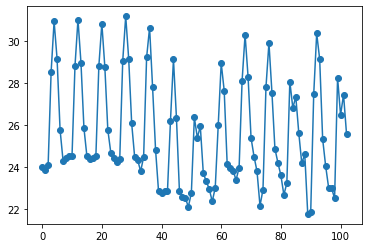

In [120]:
plt.plot(pred,'-o')

In [ ]:
SARIMAX()